In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [31]:
# Target URL
url = "http://books.toscrape.com"

In [32]:
# Send a GET request
response = requests.get("http://books.toscrape.com")

In [33]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [34]:
# Find all book containers
books = soup.find_all('article', class_='product_pod')

In [35]:
book_data = []
conversion_rate = 104  # 1 GBP ≈ 104 INR (check current rate)

for book in books:
    title = book.h3.a['title']
    price_gbp = book.find('p', class_='price_color').text  # e.g., "£51.77"
    
    # Clean the price string by removing unwanted characters
    price_gbp_cleaned = price_gbp.replace('£', '').replace('Â', '').strip()
    
    try:
        # Convert cleaned price to float
        price_gbp_value = float(price_gbp_cleaned) if price_gbp_cleaned else 0.0
        
        # Convert to INR
        price_inr = price_gbp_value * conversion_rate
        
        # Format output
        print(f"Title: {title}\nPrice (GBP): £{price_gbp_value:.2f}\nPrice (INR): ₹{price_inr:.2f}\n")
        book_data.append({
            "Title": title,
            "Price (GBP)": f"£{price_gbp_value:.2f}",
            "Price (INR)": f"₹{price_inr:.2f}"
        })
    except ValueError:
        print(f"Error converting price for '{title}': {price_gbp}")


Title: A Light in the Attic
Price (GBP): £51.77
Price (INR): ₹5384.08

Title: Tipping the Velvet
Price (GBP): £53.74
Price (INR): ₹5588.96

Title: Soumission
Price (GBP): £50.10
Price (INR): ₹5210.40

Title: Sharp Objects
Price (GBP): £47.82
Price (INR): ₹4973.28

Title: Sapiens: A Brief History of Humankind
Price (GBP): £54.23
Price (INR): ₹5639.92

Title: The Requiem Red
Price (GBP): £22.65
Price (INR): ₹2355.60

Title: The Dirty Little Secrets of Getting Your Dream Job
Price (GBP): £33.34
Price (INR): ₹3467.36

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price (GBP): £17.93
Price (INR): ₹1864.72

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price (GBP): £22.60
Price (INR): ₹2350.40

Title: The Black Maria
Price (GBP): £52.15
Price (INR): ₹5423.60

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price (GBP): £13.99
Price (INR): ₹1454.96

Title: Shakespeare's Sonnets
Price

In [36]:
df= pd.DataFrame(book_data)

In [37]:
print(df)

                                                Title Price (GBP) Price (INR)
0                                A Light in the Attic      £51.77    ₹5384.08
1                                  Tipping the Velvet      £53.74    ₹5588.96
2                                          Soumission      £50.10    ₹5210.40
3                                       Sharp Objects      £47.82    ₹4973.28
4               Sapiens: A Brief History of Humankind      £54.23    ₹5639.92
5                                     The Requiem Red      £22.65    ₹2355.60
6   The Dirty Little Secrets of Getting Your Dream...      £33.34    ₹3467.36
7   The Coming Woman: A Novel Based on the Life of...      £17.93    ₹1864.72
8   The Boys in the Boat: Nine Americans and Their...      £22.60    ₹2350.40
9                                     The Black Maria      £52.15    ₹5423.60
10     Starving Hearts (Triangular Trade Trilogy, #1)      £13.99    ₹1454.96
11                              Shakespeare's Sonnets      £20.6

In [38]:
book1 = df.iloc[19]
book1

Title          It's Only the Himalayas
Price (GBP)                     £45.17
Price (INR)                   ₹4697.68
Name: 19, dtype: object

In [39]:
top=df.tail(6)
top

,Title,Price (GBP),Price (INR)
14,Rip it Up and Start Again,£35.02,₹3642.08
15,Our Band Could Be Your Life: Scenes from the A...,£57.25,₹5954.00
16,Olio,£23.88,₹2483.52
17,Mesaerion: The Best Science Fiction Stories 18...,£37.59,₹3909.36
18,Libertarianism for Beginners,£51.33,₹5338.32
19,It's Only the Himalayas,£45.17,₹4697.68


In [40]:
top=df.head(5)
top

,Title,Price (GBP),Price (INR)
0,A Light in the Attic,£51.77,₹5384.08
1,Tipping the Velvet,£53.74,₹5588.96
2,Soumission,£50.10,₹5210.40
3,Sharp Objects,£47.82,₹4973.28
4,Sapiens: A Brief History of Humankind,£54.23,₹5639.92


In [41]:
total = df.groupby('Title')['Price (INR)'].sum().sort_values(ascending=False)

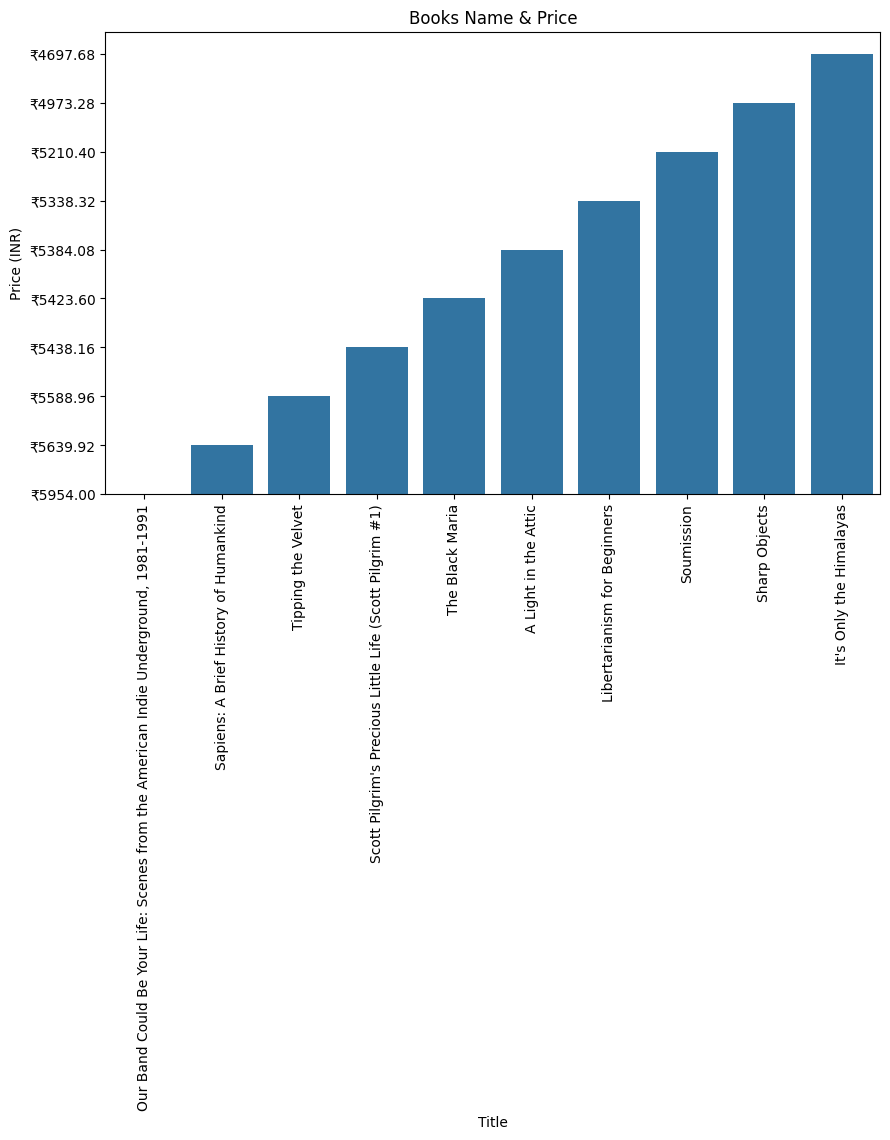

In [59]:
# Bar Chart top books with high price
top10 = total.head(10)
plt.figure(figsize=(10,6)) 
sns.barplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=90) 
plt.gca().invert_yaxis()
plt.title('Books Name & Price')
plt.xlabel('Title')
plt.ylabel('Price (INR)')
plt.show()